In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta

from setup.univ_setup import *
from setup.utils import *

from factor_mining.factors.momentum_gap import *

In [2]:
### universe setup ###
datadir = '/home/derek-qi/Documents/R3000_Data/data/r3000/'
univ = univ_setup(datadir, silent=False)
filt_na(univ)
import warnings
warnings.filterwarnings("ignore")

Setup R3000 universe
use existing binary file
0.420339 seconds


In [3]:
univ_table = stack(univ)
univ_table.date = pd.to_datetime(univ_table.date)

In [4]:
mmtgap_dict = momentum_gap(univ_table, 4, 52, q1=0.75, q2=0.25)
mmtgap_table = stack(mmtgap_dict)

In [5]:
mmtgap_table.head()

,date,ticker,momentum_gap
152974,2011-04-22,A,0.073916
152975,2011-04-22,AA,0.063447
152976,2011-04-22,AACC,0.064961
152977,2011-04-22,AAI,0.030758
152978,2011-04-22,AAMRQ,0.080703


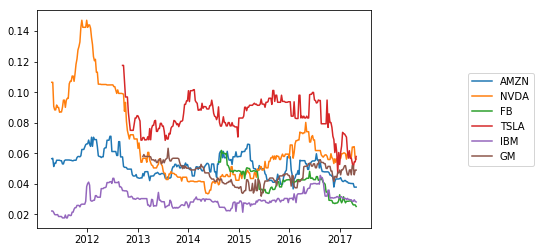

In [6]:
selTickers = ['AMZN', 'NVDA', 'FB', 'TSLA', 'IBM', 'GM']
for ticker in selTickers:
    table = mmtgap_table[mmtgap_table.ticker == ticker]
    plt.plot(table.date, table.momentum_gap.values, label=ticker)
plt.legend(loc = 'center right', bbox_to_anchor = (1.5, 0.5))
plt.show()